<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

---
## Problem Statement

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. The College Board wants to start some initiatives to increase the participation rate and has tasked you to identify states where they should start.

Identify the states that has the most potential to increase the SAT participation rate and make recommendations to the College Board on where the efforts should be focused on. Give some recommendations on what could be done.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They also have different score ranges. A summary of the two tests can be found below. ([*source*](https://act.edu.sg/sat-vs-act/?utm_source=google&utm_medium=cpc&utm_campaign=ACT-generic-tCPA&utm_keyword=act%20or%20sat&matchtype=p&device=c&adposition=&adgroupid=112386874221&gclid=EAIaIQobChMIr5iTzKqZ-QIV1AkrCh3A5A41EAAYASAAEgIcufD_Bw))

||SAT|ACT|
|:--|:-:|:---:|
|Sections|1. Reading Test, Writing & Language<br>2. Math Test <br>3. Essay (Optional)|1. English<br>2. Math<br>3. Reading<br>4. Science<br>5. Writing (Optional)|
|Scoring|1. Reading+ Writing Sections: 200 - 800<br>2. Math: 200 – 800<br>3. Total: 400 – 1600<br>Essay not counted towards the final score|Each section uses a scale of **1-36**.<br>Your total score **(out of 36)** is the average of the<br>four section scores.<br>Essay not counted towards the final score|

Both SAT and ACT are widely used for colleges and university admissions in the United States and neither SAT or ACT is harder than the other. Universities use both tests as academic measures to compare students. They are similar in difficulty with a comparable level of challenge. Most colleges will back this up, stating both tests are equally challenging. ([*source*](https://www.crimsoneducation.org/sg/blog/test-prep/sat-vs-act-whats-the-difference/#:~:text=Is%20the%20ACT%20easier%20than,both%20tests%20are%20equally%20challenging))

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from students' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Datasets used

For the purpose of the analysis, we have used the **"2017 - 2019 ACT Scores by State"** datasets and **"2017 - 2019 SAT Scores by State"** datasets. 

Information found in the "ACT Scores by State" datasets includes the participation rate, scores for English, Math, Reading, Science and the Composite score which is obtained by summing the scores for each of the four sections.

Information found in the "SAT Scores by State" datasets includes the participation rate, scores for Evidence-Based Reading and Writing (EBRW), Math and the Total score which is the sum of the scores for EBRW and Math.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Function to manually calculate mean:

def cal_mean(list_of_numbers):
    sum = 0
    count = 0
    for number in list_of_numbers:
        sum = sum + number
        count = count + 1
    return sum/count

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Function to manually calculate standard deviation

def cal_std_dev(list_of_numbers):
    sum = 0
    count = 0
    for number in list_of_numbers:
        count = count + 1
        sum = sum + (number - cal_mean(list_of_numbers))**2
    return (sum/count)**0.5

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Convert percentage to float

def convert_percentage(value):
    return float(value.replace('%',""))/100

**All libraries used are added here**

In [4]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

**1. Importing of datasets being used:** 
<br> For the purpose of the analysis, we have imported the `"2017 to 2019 ACT Scores by State"` datasets and ``"2017 to 2019 SAT Scores by State"`` datasets.

In [5]:
# Import datasets:
act_2017 = pd.read_csv("../data/act_2017.csv")
act_2018 = pd.read_csv("../data/act_2018.csv")
act_2019 = pd.read_csv("../data/act_2019.csv")
sat_2017 = pd.read_csv("../data/sat_2017.csv")
sat_2018 = pd.read_csv("../data/sat_2018.csv")
sat_2019 = pd.read_csv("../data/sat_2019.csv")

**2. Display Datasets imported:**
<br> Display the first 5 rows of the datasets imported.

In [6]:
# Display Data:
print("ACT 2017:")
print(act_2017.head())
print("")
print("ACT 2018:")
print(act_2018.head())
print("")
print("ACT 2019:")
print(act_2019.head())
print("")
print("SAT 2017:")
print(sat_2017.head())
print("")
print("SAT 2018:")
print(sat_2018.head())
print("")
print("SAT 2019:")
print(sat_2019.head())

ACT 2017:
      State Participation  English  Math  Reading  Science Composite
0  National           60%     20.3  20.7     21.4     21.0      21.0
1   Alabama          100%     18.9  18.4     19.7     19.4      19.2
2    Alaska           65%     18.7  19.8     20.4     19.9      19.8
3   Arizona           62%     18.6  19.8     20.1     19.8      19.7
4  Arkansas          100%     18.9  19.0     19.7     19.5      19.4

ACT 2018:
        State Participation  Composite
0     Alabama          100%       19.1
1      Alaska           33%       20.8
2     Arizona           66%       19.2
3    Arkansas          100%       19.4
4  California           27%       22.7

ACT 2019:
        State Participation  Composite
0     Alabama          100%       18.9
1      Alaska           38%       20.1
2     Arizona           73%       19.0
3    Arkansas          100%       19.3
4  California           23%       22.6

SAT 2017:
        State Participation  Evidence-Based Reading and Writing  Math  Tota

**3. Preparing data for merging:**
<br> 3.1. Rename columns so that the columns accross datasets are consistent.

In [7]:
# Rename column "Evidence-Based Reading and Writing" for 'sat_2017' and 'sat_2018'
# Rename column "Participation Rate" for 'sat_2019'

sat_2017.rename(columns = {'Evidence-Based Reading and Writing': 'EBRW', 'Total': 'Total_SAT'}, inplace = True)
sat_2018.rename(columns = {'Evidence-Based Reading and Writing': 'EBRW', 'Total': 'Total_SAT'}, inplace = True)
sat_2019.rename(columns = {'Participation Rate': 'Participation', 'Total': 'Total_SAT'}, inplace = True)

3.2. Drop columns `English`, `Math`, `Reading` and `Science` found in the `act_2017`datasets as these data are not available for `act_2018` and `act_2019`. We would not require these data in the analysis.

In [8]:
# Drop columns "English", "Math", "Reading". "Science" in 'act_2017'
act_2017.drop('English', axis = 1, inplace = True)
act_2017.drop('Math', axis = 1, inplace = True)
act_2017.drop('Reading', axis = 1, inplace = True)
act_2017.drop('Science', axis = 1, inplace = True)

3.3. Adding the `Year` column to all the datasets. Data can be categorised by year after they have been merged.

In [9]:
# Adding year to the dataset

act_2017['Year'] = 2017
act_2018['Year'] = 2018
act_2019['Year'] = 2019
sat_2017['Year'] = 2017
sat_2018['Year'] = 2018
sat_2019['Year'] = 2019

3.4. Remove alphabets found in `Composite` column in the `act_2017` dataset and convert data in `Composite` column in the `act_2017` dataset from string to float. No actions required for the `act_2018` dataset and `act_2019`dataset as the data type for `Composite` column in these datasets are already floats.

In [10]:
# Remove alphabets found in "Composite" column in 'act_2017' 
# Convert data in "Composite"column in 'act_2017' from string to float

act_2017['Composite'] = act_2017['Composite'].str.replace("x", "")
act_2017['Composite'] = act_2017['Composite'].astype(float)

**4. Merging the datasets:**
<br> Merge the ACT and SAT data sets to form the `sat_2017_to_2019` and `act_2017_to_2019` datasets.

In [11]:
# Merge the datasets
sat_2017_to_2019 = pd.merge(sat_2017, sat_2018, how = 'outer')
sat_2017_to_2019 = pd.merge(sat_2017_to_2019, sat_2019, how = 'outer')
act_2017_to_2019 = pd.merge(act_2017, act_2018, how = 'outer')
act_2017_to_2019 = pd.merge(act_2017_to_2019, act_2019, how = 'outer')

**5. Check the merged data frame:**
<br>
<br> **5.1. Display the data type of the columns in the merged datasets**

In [12]:
print("Data type of columns in 'act_to_2019' dataset:")
print("")
print(act_2017_to_2019.dtypes)
print("\n")

print("Summary statistics of 'sat_2017_to_2019' dataset:")
print("")
print(sat_2017_to_2019.dtypes)

Data type of columns in 'act_to_2019' dataset:

State             object
Participation     object
Composite        float64
Year               int64
dtype: object


Summary statistics of 'sat_2017_to_2019' dataset:

State            object
Participation    object
EBRW              int64
Math              int64
Total_SAT         int64
Year              int64
dtype: object


**5.2. Format and convert the `Participation` column to float**

In [13]:
# Format and convert "Participation" column in 'act_2017_to_2019' to float
act_2017_to_2019["Participation"] = act_2017_to_2019["Participation"].map(lambda Participation: convert_percentage(Participation))

# Clean, format and convert "Participation" column in 'sat_2017_to_2019' to float
sat_2017_to_2019["Participation"] = sat_2017_to_2019["Participation"].str.replace("%", "")
sat_2017_to_2019["Participation"] = sat_2017_to_2019["Participation"].map(lambda Participation: np.nan if Participation == "—" else float (Participation)/100)

**5.3. Check datasets for null values**

In [14]:
print("Info of 'act_2017_to_2019' dataset:")
print("")
print(act_2017_to_2019.info())
print("\n")

print("Info of 'sat_2017_to_2019' dataset:")
print("")
print(sat_2017_to_2019.info())

Info of 'act_2017_to_2019' dataset:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          156 non-null    object 
 1   Participation  156 non-null    float64
 2   Composite      156 non-null    float64
 3   Year           156 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 6.1+ KB
None


Info of 'sat_2017_to_2019' dataset:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          155 non-null    object 
 1   Participation  153 non-null    float64
 2   EBRW           155 non-null    int64  
 3   Math           155 non-null    int64  
 4   Total_SAT      155 non-null    int64  
 5   Year           155 non-null    int64  
dtypes: float64(1), int64(4), obj

Noted that there are 2 null cells in the "Participation" column for the SAT dataset. Null cells pertains to participation rate info for the state of Puerto Rico and Virgin Islands as the information is not available. Since we will not be able to perform any analysis with just the total score, we will remove these two row from the dataset to prevent the data from getting skewed.

**5.4. Drop rows with null values found in the `Participation` column in the `sat_2017_to_2019` dataset**

In [15]:
# Drop null rows found in 'sat_2017_to_2019'
sat_2017_to_2019 = sat_2017_to_2019.dropna()

**5.5. Check the datasets for duplicated row**

In [16]:
# Check if there are duplicates in the datasets

print("Duplicates in sat_2017_to_2019:")
print(sat_2017_to_2019[sat_2017_to_2019.duplicated()])
print("")

print("Duplicates in act_2017_to_2019:")
print(act_2017_to_2019[act_2017_to_2019.duplicated()])

Duplicates in sat_2017_to_2019:
Empty DataFrame
Columns: [State, Participation, EBRW, Math, Total_SAT, Year]
Index: []

Duplicates in act_2017_to_2019:
    State  Participation  Composite  Year
72  Maine           0.07       24.0  2018


Noted that there is a duplicate! We will proceed to remove it.

**5.6. Remove duplicated row from the dataset**

In [17]:
# Remove duplicate row from dataset
act_2017_to_2019 = act_2017_to_2019.drop_duplicates(keep = 'first')

# Check that the duplicates have been removed.
print("Duplicates in act_2017_to_2019:")
print(act_2017_to_2019[act_2017_to_2019.duplicated()])

Duplicates in act_2017_to_2019:
Empty DataFrame
Columns: [State, Participation, Composite, Year]
Index: []


The duplicate has been removed from the dataset.

**5.7. Check the summary statistics of the `sat_2017_to_2019` and `act_2017_to_2019` dataset**

In [18]:
# Showing the summary statistics of the "act_2017_to_2019" dataset and "sat_2017_to_2019" dataset:
print("Summary Statistics for act_2017_to_2019 dataset:")
print("")
print(act_2017_to_2019.describe())
print("\n")

print("Summary Statistics for sat_2017_to_2019 dataset:")
print("")
print(sat_2017_to_2019.describe())

Summary Statistics for act_2017_to_2019 dataset:

       Participation   Composite         Year
count     155.000000  155.000000   155.000000
mean        0.618065   21.485161  2018.000000
std         0.332595    2.084008     0.821781
min         0.060000   17.700000  2017.000000
25%         0.290000   19.800000  2017.000000
50%         0.660000   21.200000  2018.000000
75%         1.000000   23.600000  2019.000000
max         1.000000   25.600000  2019.000000


Summary Statistics for sat_2017_to_2019 dataset:

       Participation        EBRW        Math    Total_SAT         Year
count     153.000000  153.000000  153.000000   153.000000   153.000000
mean        0.448693  564.535948  552.019608  1119.732026  2018.000000
std         0.370944   46.301362   63.246434    94.162654     0.819178
min         0.020000  480.000000   52.000000   943.000000  2017.000000
25%         0.040000  531.000000  521.000000  1053.000000  2017.000000
50%         0.500000  554.000000  546.000000  1099.000000 

Noted that the minimum value for the `math_sat` column is significantly lower than value for the 25th percentile. As mentioned in the backgroud information above, the lowest possibe score for the math section is 200. This indicates that the data for this row is most probably wrong.

**5.8 Fixing of error found in 5.7.**
<br><br> Find the row with the minimum value

In [19]:
# Find the row with the minimum value
sat_2017_to_2019[sat_2017_to_2019['Math'] == 52]

,State,Participation,EBRW,Math,Total_SAT,Year
20,Maryland,0.69,536,52,1060,2017


Since EBRW + Math = Total_SAT, Math will be equal to Total_SAT - EBRW which will equal to 524.

In [20]:
# Change the value from 52 to 524
sat_2017_to_2019['Math'].iloc[20] = 524

# Check if the change went through
sat_2017_to_2019.iloc[20]

State            Maryland
Participation        0.69
EBRW                  536
Math                  524
Total_SAT            1060
Year                 2017
Name: 20, dtype: object

Check revised summary statistics to see if there are any more unnatural values.

In [21]:
# Showing the revised summary statistics of the "act_2017_to_2019" dataset and "sat_2017_to_2019" dataset:
print("Summary Statistics for act_2017_to_2019 dataset:")
print("")
print(act_2017_to_2019.describe())
print("\n")

print("Summary Statistics for sat_2017_to_2019 dataset:")
print("")
print(sat_2017_to_2019.describe())

Summary Statistics for act_2017_to_2019 dataset:

       Participation   Composite         Year
count     155.000000  155.000000   155.000000
mean        0.618065   21.485161  2018.000000
std         0.332595    2.084008     0.821781
min         0.060000   17.700000  2017.000000
25%         0.290000   19.800000  2017.000000
50%         0.660000   21.200000  2018.000000
75%         1.000000   23.600000  2019.000000
max         1.000000   25.600000  2019.000000


Summary Statistics for sat_2017_to_2019 dataset:

       Participation        EBRW        Math    Total_SAT         Year
count     153.000000  153.000000  153.000000   153.000000   153.000000
mean        0.448693  564.535948  555.104575  1119.732026  2018.000000
std         0.370944   46.301362   48.485370    94.162654     0.819178
min         0.020000  480.000000  460.000000   943.000000  2017.000000
25%         0.040000  531.000000  521.000000  1053.000000  2017.000000
50%         0.500000  554.000000  546.000000  1099.000000 

The lowest possible total score for ACT is 1 and the highest possible total score for ACT is 36. ([*source*](https://www.usnews.com/education/blogs/college-admissions-playbook/articles/how-to-read-your-act-score-report#:~:text=The%20lowest%20composite%20score%20you,score%20nationally%20was%20a%2020.6.))The lowest and highest value in the `act_2017_to_2019` dataset falls between this range and this looks reasonable.
<br><br> The lowest possible and highest possible SAT score for each section is 200 and 800 respectively. This means that the lowest possible total SAT score and highest possible total SAT score is 400 and 1600 respectively. ([*source*](https://www.princetonreview.com/college-advice/guide-to-sat-scores#:~:text=The%20highest%20SAT%20score%20you,between%20200%20and%20800%20points.)) Thus, the lowest and highest value in the `sat_2017_to_2019` dataset looks reasonable as the lowest and highest values all the columns falls within this range.

All the values looks reasonable now!

**5.9. Check the name of states found in the `sat_2017_to_2019` and `act_2017_to_2019` dataset**

In [22]:
# Check name of the states found in the 'sat_2017_to_2019' and 'act_2018_to_2019' dataset

print("Unique States for act_2017_to_2019:")
print("")
print(act_2017_to_2019.State.sort_values().unique())
print("\n")

print("Unique States for sat_2017_to_2019:")
print("")
print(sat_2017_to_2019.State.sort_values().unique())
print("\n")

Unique States for act_2017_to_2019:

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'District of columbia'
 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'National' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Unique States for sat_2017_to_2019:

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi'

Noted that 'District of Columbia' is being shown twice in the act_2017_to_2019 dataset as the 'c' in the 'District of columbia'is not being capitalised.

**5.10. Fixing of error found in 5.9.**

In [23]:
# Find the row with 'District of columbia'
act_2017_to_2019[act_2017_to_2019['State'] == 'District of columbia']

,State,Participation,Composite,Year
60,District of columbia,0.32,23.6,2018


In [24]:
# Change the value from 'District of columbia' to 'District of Columbia'
act_2017_to_2019.loc[60, 'State'] = 'District of Columbia'

# Check if the change went through
print("Unique States for act_2017_to_2019:")
print("")
print(act_2017_to_2019.State.sort_values().unique())

Unique States for act_2017_to_2019:

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'National' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


**5.11. Rename columns in the `sat_2017_to_2019` and `act_2017_to_2019` dataset**

In [25]:
# Rename columns for 'act_2017_to_2019' and 'sat_2017_to_2019'
act_2017_to_2019.rename(columns = {'Composite': 'Total_ACT', 'Participation': 'Participation_ACT'}, inplace = True)
sat_2017_to_2019.rename(columns = {
    'Participation': 'Participation_SAT',
    'EBRW': 'EBRW_SAT',
    'Math': 'Math_SAT'
}, inplace = True)

# Changing the column names to lowercase
act_2017_to_2019.columns = act_2017_to_2019.columns.str.lower()
sat_2017_to_2019.columns = sat_2017_to_2019.columns.str.lower()

**6. Merging and sorting the values in the dataset in ascending order by `State` and `Year`**

In [26]:
# Merge 'act_2017_to_2019' and 'sat_2017_to_2019'
combined = pd.merge(act_2017_to_2019, sat_2017_to_2019, how = 'outer', on = ['state', 'year'])

# Sort values in Combined file
combined = combined.sort_values(['state', 'year']).reset_index(drop = True)

**7. Final high level check of datasets before exporting**

In [27]:
print("act_2017_to_2019 dataset:")
print("")
print(act_2017_to_2019.head())
print("\n")

print("sat_2017_to_2019 dataset:")
print("")
print(sat_2017_to_2019.head())
print("\n")

print("Combined dataset:")
print("")
print(combined.head())

act_2017_to_2019 dataset:

      state  participation_act  total_act  year
0  National               0.60       21.0  2017
1   Alabama               1.00       19.2  2017
2    Alaska               0.65       19.8  2017
3   Arizona               0.62       19.7  2017
4  Arkansas               1.00       19.4  2017


sat_2017_to_2019 dataset:

        state  participation_sat  ebrw_sat  math_sat  total_sat  year
0     Alabama               0.05       593       572       1165  2017
1      Alaska               0.38       547       533       1080  2017
2     Arizona               0.30       563       553       1116  2017
3    Arkansas               0.03       614       594       1208  2017
4  California               0.53       531       524       1055  2017


Combined dataset:

     state  participation_act  total_act  year  participation_sat  ebrw_sat  \
0  Alabama               1.00       19.2  2017               0.05     593.0   
1  Alabama               1.00       19.1  2018           

The datasets are now ready for analysis!

**8. Exporting of the `sat_2017_to_2019`, `act_2017_to_2019` and `combined` datasets as csv**

In [28]:
# Exporting of merged datasets to csv
sat_2017_to_2019.to_csv('../data/sat_2017_to_2019.csv')
act_2017_to_2019.to_csv('../data/act_2017_to_2019.csv')
combined.to_csv('../data/combined.csv')

### Data Dictionary

In [29]:
# Creating a data dictionary

data_dict = {
    "act_2017_to_2019": {
        "state":{
            "Type": "string",
            "Description": "States found in the United States."
        },
        "participation_act":{
            "Type": "float",
            "Description": "Percentage of the population taking ACT. Percentage is shown in decimal form."
        },
        "total_act":{
            "Type": "float",
            "Description": "Overall score obtained by summing the scores of all the ACT sections."
        },
        "year":{
            "Type": "int",
            "Description": "The year the data pertains to."
        },
    },
    "sat_2017_to_2019": {
        "state":{
            "Type": "string",
            "Description": "States found in the United States."
        },
        "participation_sat":{
            "Type": "float",
            "Description": "% of the population taking SAT."
        },
        "ebrw_sat":{
            "Type": "int",
            "Description": "Score for the Evidence-Based Reading and Writing section."
        },
        "math_sat":{
            "Type": "int",
            "Description": "Score for the Math section."
        },
        "total_sat":{
            "Type": "int",
            "Description": "Overall score obtained by summing the scores of all the SAT sections."
        },
        "year":{
            "Type": "int",
            "Description": "The year the data pertains to."
        }
    },
    "combined": {
        "state":{
            "Type": "string",
            "Description": "States found in the United States."
        },
        "participation_act":{
            "Type": "float",
            "Description": "Percentage of the population taking ACT. Percentage is shown in decimal form."
        },
        "total_act":{
            "Type": "float",
            "Description": "Overall score obtained by summing the scores of all the ACT sections."
        },
        "year":{
            "Type": "int",
            "Description": "The year the data pertains to."
        },
            "participation_sat":{
            "Type": "float",
            "Description": "% of the population taking SAT."
        },
        "ebrw_sat":{
            "Type": "int",
            "Description": "Score for the Evidence-Based Reading and Writing section."
        },
        "math_sat":{
            "Type": "int",
            "Description": "Score for the Math section."
        },
        "total_sat":{
            "Type": "int",
            "Description": "Overall score obtained by summing the scores of all the SAT sections."
        }
    }
}

**Data Dictionary (table form):**
 Three main datasets were used in this project. The data dictionaries of the datasets can be found below.

<br>**Dataset name: `act_2017_to_2019`**
<br>This dataset contains the aggregate ACT scores and participation rates by states from 2017 to 2019.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|state|string|act_2017_to_2019|States found in the United States.|
|participation_act|float|act_2017_to_2019|Percentage of the population taking ACT. Percentage is shown in decimal form.|
|total_ACT|float|act_2017_to_2019|Overall score obtained by summing the scores of all the ACT sections.|
|year|int|act_2017_to_2019|The year the data pertains to.|

<br>**Dataset name: `sat_2017_to_2019`**
<br>This dataset contains the aggregate SAT scores and participation rates by states from 2017 to 2019.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|state|string|sat_2017_to_2019|States found in the United States.|
|participation_sat|float|sat_2017_to_2019|Percentage of the population taking SAT. Percentage is shown in decimal form.|
|ebrw_sat|int|sat_2017_to_2019|Score for the Evidence-Based Reading and Writing section.|
|math_sat|int|sat_2017_to_2019|Score for the Math section.|
|total_sat|int|sat_2017_to_2019|Overall score obtained by summing the scores of all the SAT sections.|
|year|int|sat_2017_to_2019|The year the data pertains to.|

<br>**Dataset name: `combined`**
<br>This dataset contains the aggregate ACT and SAT scores and participation rates by states from 2017 to 2019.

| Feature | Type | Dataset | Description |
|:--|:-:|:-:|:--|
|state|string|combined|States found in the United States.|
|participation_act|float|combined|Percentage of the population taking ACT. Percentage is shown in decimal form.|
|total_ACT|float|combined|Overall score obtained by summing the scores of all the ACT sections.|
|year|int|combined|The year the data pertains to.|
|state|string|combined|States found in the United States.|
|participation_sat|float|combined|Percentage of the population taking SAT. Percentage is shown in decimal form.|
|ebrw_sat|int|combined|Score for the Evidence-Based Reading and Writing section.|
|math_sat|int|combined|Score for the Math section.|
|total_sat|int|combined|Overall score obtained by summing the scores of all the SAT sections.|

## Exploratory Data Analysis

**1. Show the summary statistics for the `act_2017_to_2019` and `sat_2017_to_2019` datasets**

In [30]:
# Showing the summary statistics of the "act_2017_to_2019" dataset and "sat_2017_to_2019" dataset:
print("Summary Statistics for act_2017_to_2019 dataset:")
print("")
print(act_2017_to_2019.describe())
print("\n")

print("Summary Statistics for sat_2017_to_2019 dataset:")
print("")
print(sat_2017_to_2019.describe())

Summary Statistics for act_2017_to_2019 dataset:

       participation_act   total_act         year
count         155.000000  155.000000   155.000000
mean            0.618065   21.485161  2018.000000
std             0.332595    2.084008     0.821781
min             0.060000   17.700000  2017.000000
25%             0.290000   19.800000  2017.000000
50%             0.660000   21.200000  2018.000000
75%             1.000000   23.600000  2019.000000
max             1.000000   25.600000  2019.000000


Summary Statistics for sat_2017_to_2019 dataset:

       participation_sat    ebrw_sat    math_sat    total_sat         year
count         153.000000  153.000000  153.000000   153.000000   153.000000
mean            0.448693  564.535948  555.104575  1119.732026  2018.000000
std             0.370944   46.301362   48.485370    94.162654     0.819178
min             0.020000  480.000000  460.000000   943.000000  2017.000000
25%             0.040000  531.000000  521.000000  1053.000000  2017.00000

ACT participation rates ranges from 6% to 100% for the period 2017 to 2019 whereas the SAT participation rates ranges from 2% to 100%. 

The lowest possible total score for ACT is 1 and the highest possible total score for ACT is 36. ([*source*](https://www.usnews.com/education/blogs/college-admissions-playbook/articles/how-to-read-your-act-score-report#:~:text=The%20lowest%20composite%20score%20you,score%20nationally%20was%20a%2020.6.))The lowest and highest value in the `act_2017_to_2019` dataset falls between this range and this looks reasonable.
<br><br> The lowest possible and highest possible SAT score for each section is 200 and 800 respectively. This means that the lowest possible total SAT score and highest possible total SAT score is 400 and 1600 respectively. ([*source*](https://www.princetonreview.com/college-advice/guide-to-sat-scores#:~:text=The%20highest%20SAT%20score%20you,between%20200%20and%20800%20points.)) Thus, the lowest and highest value in the `sat_2017_to_2019` dataset looks reasonable as the lowest and highest values all the columns falls within this range.

**2. Use dictionary comprehension to apply the standard deviation to each numeric column in the dataframe**

In [31]:
# Use a dictionary comprehension to apply the standard deviation to each numeric column in the dataframe. 
sd_act_2017_to_2019 = {key: cal_std_dev(value) for key,value in act_2017_to_2019.iloc[:, 1:].items()}
print(sd_act_2017_to_2019)

sd_sat_2017_to_2019 = {key: cal_std_dev(value) for key,value in sat_2017_to_2019.iloc[:, 1:].items()}
print(sd_sat_2017_to_2019)

{'participation_act': 0.33152063483520916, 'total_act': 2.0772746894129708, 'year': 0.8191262063537486}
{'participation_sat': 0.3697299717899723, 'ebrw_sat': 46.14980241905189, 'math_sat': 48.326661256683224, 'total_sat': 93.8544281331918, 'year': 0.816496580927726}


The standard deviations obtained using the `.describe()` function and the `cal_std_dev()` function are relatively close to each other. There are some slight differences that are relatively immaterial.

**3. Which states have the lowest and highest participation rates for the 2019 SAT and ACT?**

We have only analysed the participation rates for 2019 as this is the latest data that we have. Identifying the states with the lowest and highest participation rates for 2017 and 2018 will not be useful at this point of time. As such we will skip this analysis for 2017 and 2018.

**States with Lowest and Highest Participation Rate for ACT**

In [32]:
act_2019 = act_2017_to_2019[act_2017_to_2019['year'] == 2019]
act_min_state_2019 = act_2019[act_2019['participation_act'] == act_2019['participation_act'].min()]
act_max_state_2019 = act_2019[act_2019['participation_act'] == act_2019['participation_act'].max()]

print('States with the lowest participation rate for act_2019:')
print("")
print(act_min_state_2019.to_string(index = False))
print("\n")

print('States with the highest participation rate for act_2019:')
print("")
print(act_max_state_2019.to_string(index = False))

States with the lowest participation rate for act_2019:

state  participation_act  total_act  year
Maine               0.06       24.3  2019


States with the highest participation rate for act_2019:

         state  participation_act  total_act  year
       Alabama                1.0       18.9  2019
      Arkansas                1.0       19.3  2019
      Kentucky                1.0       19.8  2019
     Louisiana                1.0       18.8  2019
   Mississippi                1.0       18.4  2019
       Montana                1.0       19.8  2019
      Nebraska                1.0       20.0  2019
        Nevada                1.0       17.9  2019
North Carolina                1.0       19.0  2019
          Ohio                1.0       20.0  2019
      Oklahoma                1.0       18.9  2019
     Tennessee                1.0       19.4  2019
          Utah                1.0       20.3  2019
     Wisconsin                1.0       20.3  2019
       Wyoming                1.0 

Maine has the lowest participation rate of 6% in 2019. This is likely because SAT is still the test of choice in this state. However, the SAT, which was once required in Maine, is now optional as well.

There are 15 states with 100% participation rates in 2019. These are the states that have administered the ACT statewide.

**States with Lowest and Highest Participation Rate for SAT**

In [33]:
sat_2019 = sat_2017_to_2019[sat_2017_to_2019['year'] == 2019]
sat_min_state_2019 = sat_2019[sat_2019['participation_sat'] == sat_2019['participation_sat'].min()]
sat_max_state_2019 = sat_2019[sat_2019['participation_sat'] == sat_2019['participation_sat'].max()]

print('States with the lowest participation rate for sat_2019:')
print("")
print(sat_min_state_2019.to_string(index = False))
print("\n")

print('States with the highest participation rate for sat_2019:')
print("")
print(sat_max_state_2019.to_string(index = False))

States with the lowest participation rate for sat_2019:

       state  participation_sat  ebrw_sat  math_sat  total_sat  year
North Dakota               0.02       627       636       1263  2019


States with the highest participation rate for sat_2019:

       state  participation_sat  ebrw_sat  math_sat  total_sat  year
    Colorado                1.0       518       506       1024  2019
 Connecticut                1.0       529       516       1046  2019
    Delaware                1.0       499       486        985  2019
     Florida                1.0       516       483        999  2019
       Idaho                1.0       505       488        993  2019
    Illinois                1.0       509       504       1013  2019
    Michigan                1.0       507       496       1003  2019
Rhode Island                1.0       503       492        995  2019


North Dakota has the lowest participation rate of 2% in 2019. This is likely because ACT is still the test of choice in this state. ACT participation rate for North Dakota is 96% in 2019.

There are 8 states with 100% participation rates in 2019. These are probably the states that have administered the SAT statewide.

**4. Which states have the highest and lowest mean total/composite scores for the 2017, 2018 or 2019 SAT and ACT?**

**States with Lowest and Highest mean Total Score for ACT**

In [34]:
act_mean = act_2017_to_2019.groupby('state')['total_act'].mean()
act_min_mean = act_mean[act_mean == act_mean.min()]
act_max_mean = act_mean[act_mean == act_mean.max()]

print('States with the lowest mean Total Scores for ACT:')
print("")
print(act_min_mean.to_string())
print("\n")

print('States with the highest mean Total Scores for ACT:')
print("")
print(act_max_mean.to_string())

States with the lowest mean Total Scores for ACT:

state
Nevada    17.8


States with the highest mean Total Scores for ACT:

state
Massachusetts    25.466667


Nevada has the lowest mean total score of 17.8 from 2017 to 2019 while the Massachusetts has the highest mean total score of 25.5 from 2017 to 2019.

**States with Lowest and Highest mean Total Score for SAT**

In [35]:
sat_mean = sat_2017_to_2019.groupby('state')['total_sat'].mean()
sat_min_mean = sat_mean[sat_mean == sat_mean.min()]
sat_max_mean = sat_mean[sat_mean == sat_mean.max()]

print('States with the lowest mean Total Scores for SAT:')
print("")
print(sat_min_mean.to_string())
print("\n")

print('States with the highest mean Total Scores for SAT:')
print("")
print(sat_max_mean.to_string())

States with the lowest mean Total Scores for SAT:

state
District of Columbia    967.333333


States with the highest mean Total Scores for SAT:

state
Minnesota    1292.333333


District of Columbia has the lowest mean total score of 967.3 over the years while the Minnesota has the highest mean total score of 1,292.3 from 2017 to 2019.

**5. Do any states with 100% participation on a given test have a rate change year-to-year?**

##### States with 100% Participation for ACT

In [36]:
# States with 100% Participation for 2017
pivot = pd.pivot_table(act_2017_to_2019, values=['participation_act'],index=['state'], columns = ["year"], aggfunc='sum')
pivot_2017 = pivot[pivot['participation_act'][2017] == 1]

print("States with 100% Participation for 2017:")
print("")
print(pivot_2017.participation_act)
print("\n")

# States with 100% Participation for 2017
pivot = pd.pivot_table(act_2017_to_2019, values=['participation_act'],index=['state'], columns = ["year"], aggfunc='sum')
pivot_2018 = pivot[pivot['participation_act'][2018] == 1]

print("States with 100% Participation for 2018:")
print("")
print(pivot_2018.participation_act)
print("\n")

# States with 100% Participation for 2017
pivot = pd.pivot_table(act_2017_to_2019, values=['participation_act'],index=['state'], columns = ["year"], aggfunc='sum')
pivot_2019 = pivot[pivot['participation_act'][2019] == 1]

print("States with 100% Participation for 2019:")
print("")
print(pivot_2019.participation_act)

States with 100% Participation for 2017:

year            2017  2018  2019
state                           
Alabama          1.0  1.00  1.00
Arkansas         1.0  1.00  1.00
Colorado         1.0  0.30  0.27
Kentucky         1.0  1.00  1.00
Louisiana        1.0  1.00  1.00
Minnesota        1.0  0.99  0.95
Mississippi      1.0  1.00  1.00
Missouri         1.0  1.00  0.82
Montana          1.0  1.00  1.00
Nevada           1.0  1.00  1.00
North Carolina   1.0  1.00  1.00
Oklahoma         1.0  1.00  1.00
South Carolina   1.0  1.00  0.78
Tennessee        1.0  1.00  1.00
Utah             1.0  1.00  1.00
Wisconsin        1.0  1.00  1.00
Wyoming          1.0  1.00  1.00


States with 100% Participation for 2018:

year            2017  2018  2019
state                           
Alabama         1.00   1.0  1.00
Arkansas        1.00   1.0  1.00
Kentucky        1.00   1.0  1.00
Louisiana       1.00   1.0  1.00
Mississippi     1.00   1.0  1.00
Missouri        1.00   1.0  0.82
Montana         1.00   

Colorado, Minnesota, Missouri and South Carolina had a participation rate of 100% in 2017 but the rate has dropped over the years. The state of Colorado has the biggest drop from 100% in 2017 to 30% in 2018 and 27% in 2019. This is due to SAT being made compulsory in Colorado from 2018. SAT participation rates in Colorado in 2018 and 2019 is at 100%.

There are also states that had improved participation rates in 2018. Nebraska and Ohio's participation rate increased from 84% to 100% and 75% to 100% respectively. This is probably due to ACT being made mandatory in these states.

##### States with 100% Participation for SAT

In [37]:
# States with 100% Participation for 2017
pivot = pd.pivot_table(sat_2017_to_2019, values=['participation_sat'],index=['state'], columns = ["year"], aggfunc='sum')
pivot_2017 = pivot[pivot['participation_sat'][2017] == 1]

print("States with 100% Participation for 2017:")
print("")
print(pivot_2017.participation_sat)
print("\n")

# States with 100% Participation for 2017
pivot = pd.pivot_table(sat_2017_to_2019, values=['participation_sat'],index=['state'], columns = ["year"], aggfunc='sum')
pivot_2018 = pivot[pivot['participation_sat'][2018] == 1]

print("States with 100% Participation for 2018:")
print("")
print(pivot_2018.participation_sat)
print("\n")

# States with 100% Participation for 2017
pivot = pd.pivot_table(sat_2017_to_2019, values=['participation_sat'],index=['state'], columns = ["year"], aggfunc='sum')
pivot_2019 = pivot[pivot['participation_sat'][2019] == 1]

print("States with 100% Participation for 2019:")
print("")
print(pivot_2019.participation_sat)

States with 100% Participation for 2017:

year                  2017  2018  2019
state                                 
Connecticut            1.0  1.00  1.00
Delaware               1.0  1.00  1.00
District of Columbia   1.0  0.92  0.94
Michigan               1.0  1.00  1.00


States with 100% Participation for 2018:

year         2017  2018  2019
state                        
Colorado     0.11   1.0   1.0
Connecticut  1.00   1.0   1.0
Delaware     1.00   1.0   1.0
Idaho        0.93   1.0   1.0
Michigan     1.00   1.0   1.0


States with 100% Participation for 2019:

year          2017  2018  2019
state                         
Colorado      0.11  1.00   1.0
Connecticut   1.00  1.00   1.0
Delaware      1.00  1.00   1.0
Florida       0.83  0.56   1.0
Idaho         0.93  1.00   1.0
Illinois      0.09  0.99   1.0
Michigan      1.00  1.00   1.0
Rhode Island  0.71  0.97   1.0


The District of Columbia had a participation rate of 100% in 2017 but the rate has dropped over the years. This is because SAT is no longer compulsory in the state. However, it is interesting to note that majority of the still chose SAT as the prefered choice of test as the participation rate is at 92% and 94% for 2018 and 2019 respectively.
<br><br> The participation rate in Florida, Idaho, Illinois and Rhode Island in 2019 increased to 100% as SAT was probably made compulsory in these states.

**6. Do any states show have >50% participation on both tests each year?**

In [38]:
# Filter for states with >50% participation on both tests
filtered_combined = combined[combined["participation_act"] > 0.5]
filtered_combined = filtered_combined[filtered_combined["participation_sat"] > 0.5]

print("States with >50% participation on both tests in 2017:")
print("")
print(filtered_combined[filtered_combined["year"] == 2017][['state', 'participation_act', 'participation_sat']].to_string(index = False))
print("\n")

print("States with >50% participation on both tests in 2018:")
print("")
print(filtered_combined[filtered_combined["year"] == 2018][['state', 'participation_act', 'participation_sat']].to_string(index = False))
print("\n")

print("States with >50% participation on both tests in 2019:")
print("")
print(filtered_combined[filtered_combined["year"] == 2019][['state', 'participation_act', 'participation_sat']].to_string(index = False))

States with >50% participation on both tests in 2017:

  state  participation_act  participation_sat
Florida               0.73               0.83
Georgia               0.55               0.61
 Hawaii               0.90               0.55


States with >50% participation on both tests in 2018:

         state  participation_act  participation_sat
       Florida               0.66               0.56
       Georgia               0.53               0.70
        Hawaii               0.89               0.56
North Carolina               1.00               0.52
South Carolina               1.00               0.55


States with >50% participation on both tests in 2019:

         state  participation_act  participation_sat
       Florida               0.54               1.00
        Hawaii               0.80               0.54
North Carolina               1.00               0.51
South Carolina               0.78               0.68


There are several states that have a participation rate of more than 50% for both tests, the most interesting being Florida and North Carolina. Florida has a 54% participation rate for ACT despite SAT being made compulsory in the state. Similarly, North Carolina has a 51% particiation rate for SAT despite ACT being made compulsory. This means majority of the students in these two states chose to take both SAT and ACT despite only requiring one of the test for college admissions.

## Visualize the Data

**Overall SAT Participation Rate**

AxesSubplot(0.125,0.125;0.775x0.755)


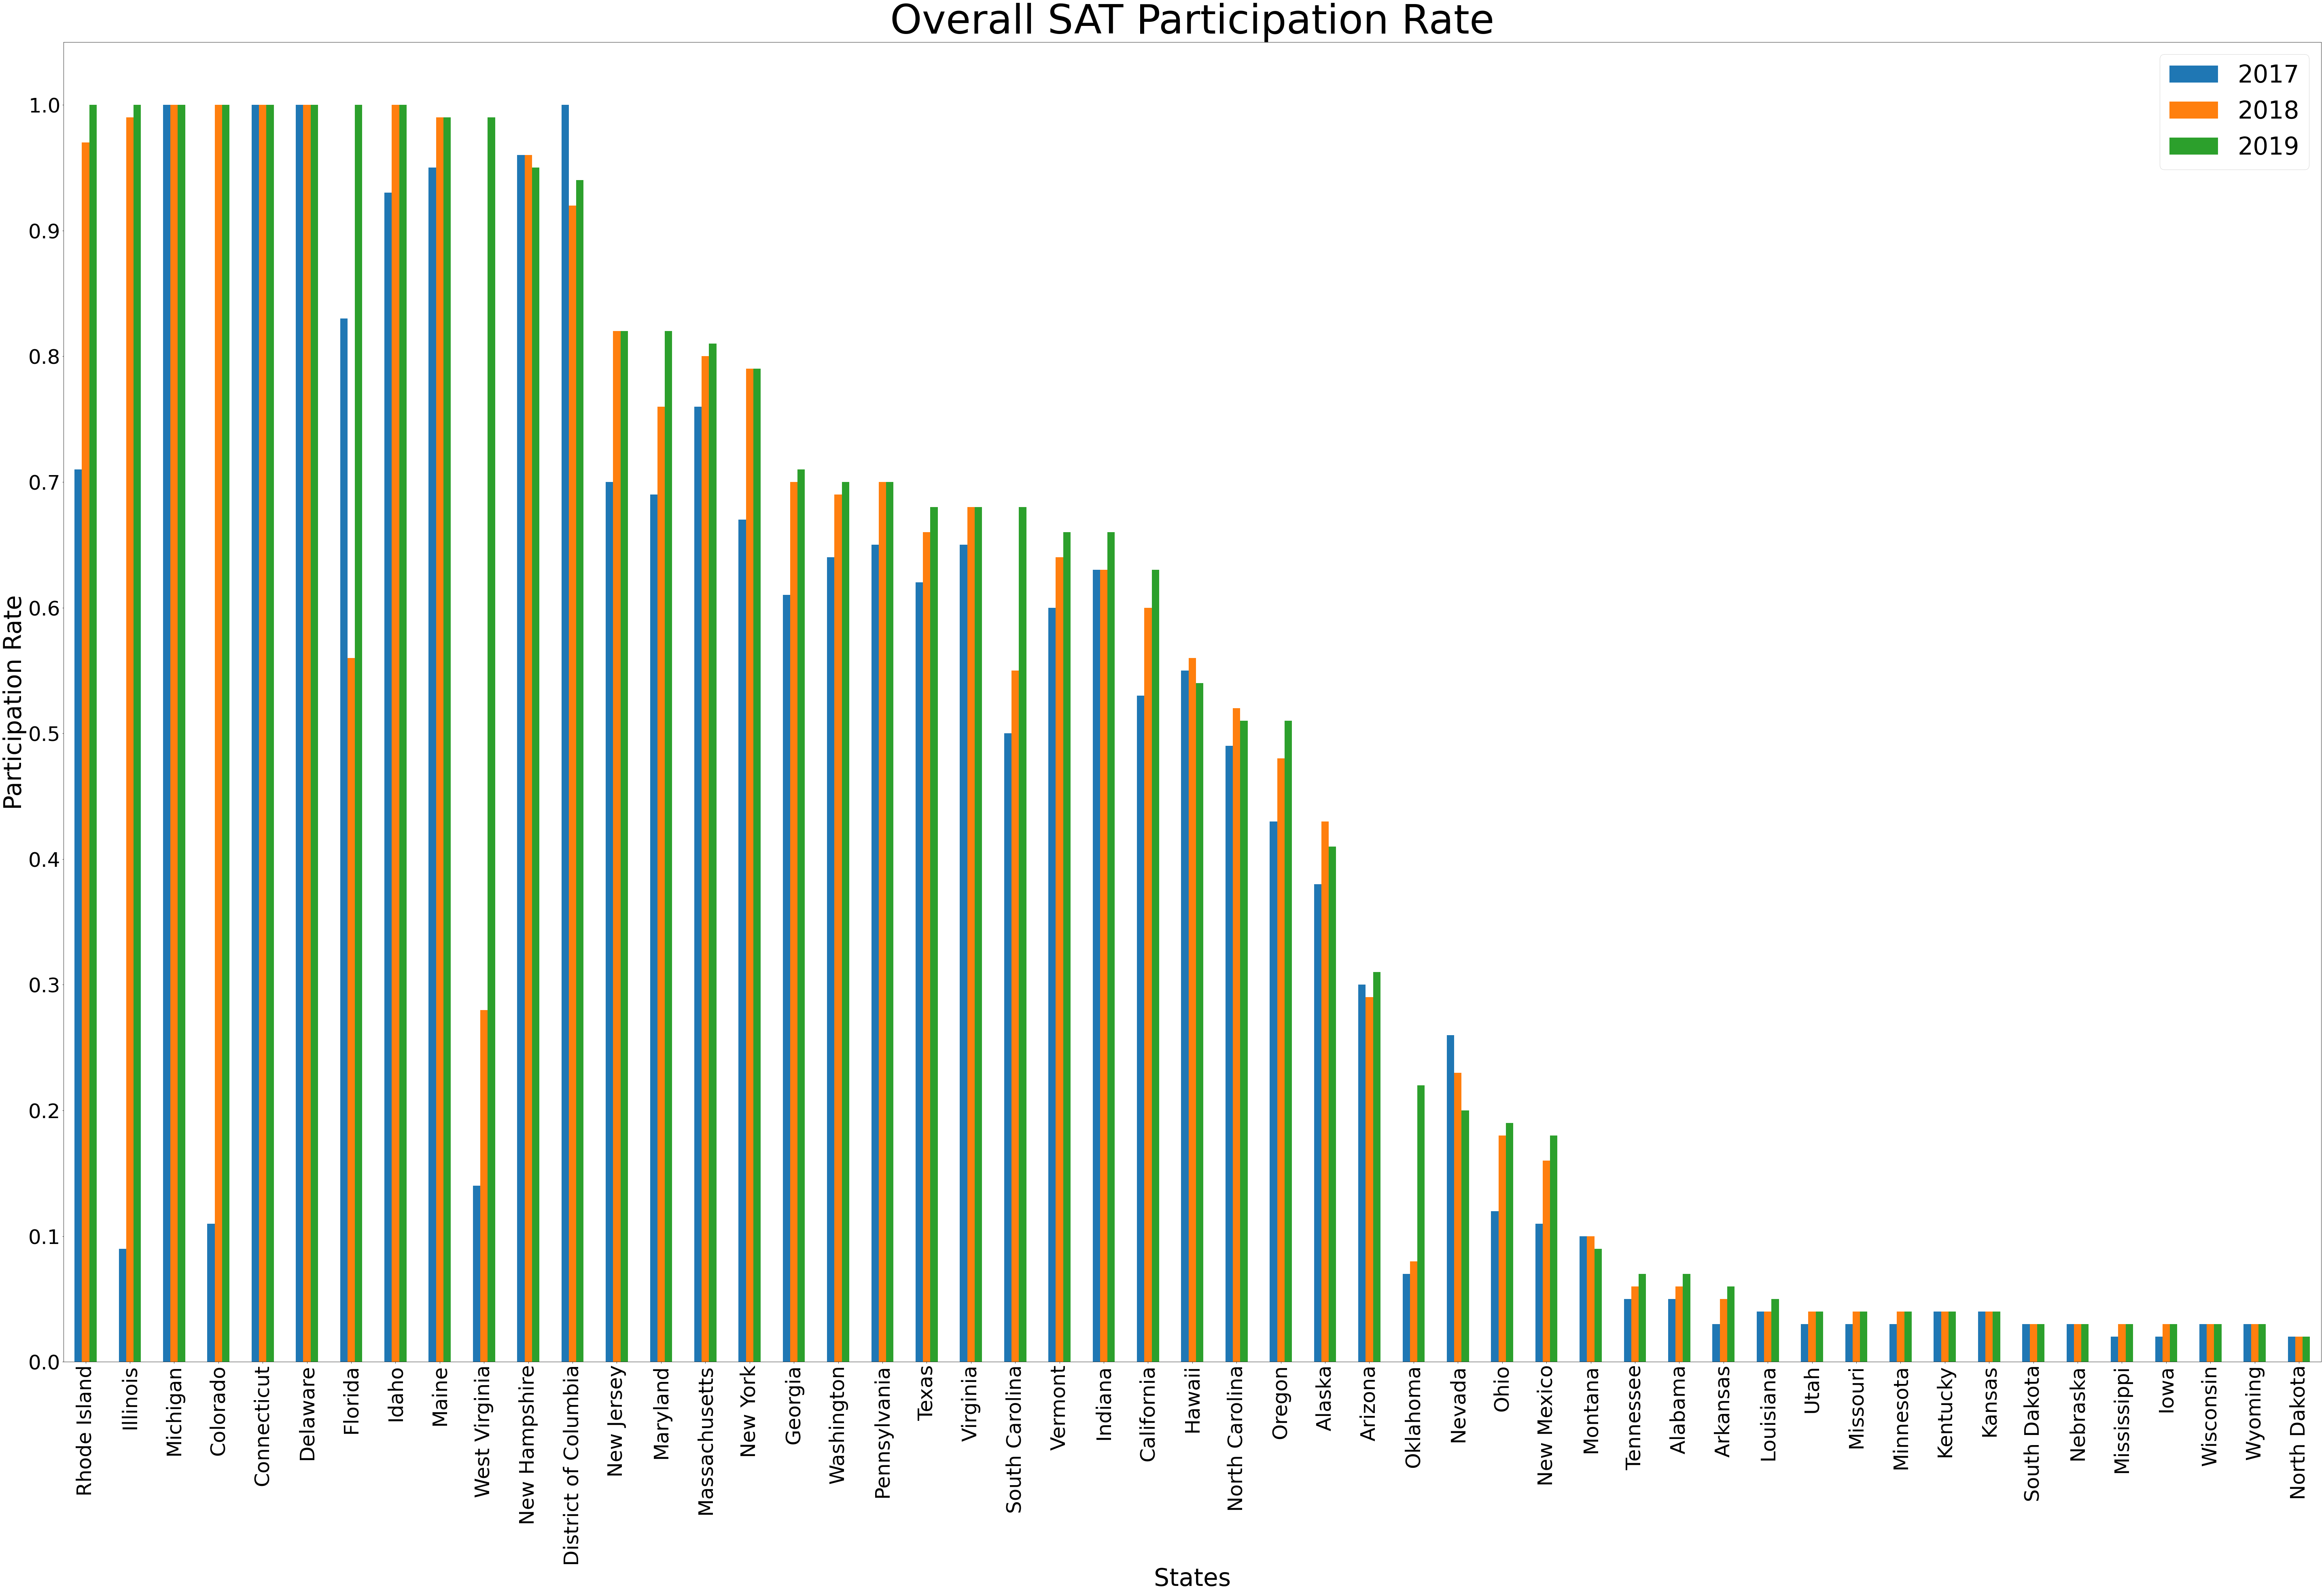

In [39]:
# Pivot for required data
pivot = pd.pivot_table(sat_2017_to_2019, values=['participation_sat'],index=['state'], columns = ["year"], aggfunc='sum')
pivot = pivot['participation_sat'].sort_values(by = 2019, ascending = False)

# Plotting of chart
sat_chart = pivot.plot(kind = 'bar', figsize = (100,60), fontsize = 50, width = 0.5)
sat_chart.set_title("Overall SAT Participation Rate", fontsize = 100)
sat_chart.legend(fontsize = 60, loc = 1)
sat_chart.set_ylabel('Participation Rate', fontsize = 60)
sat_chart.set_xlabel('States', fontsize = 60)
plt.yticks(np.arange(0, 1.1, 0.1))

print(sat_chart)

**Observations:**

The overall SAT participation rates for most states have remained relatively stable over the three years. A huge jump of particiption rates could be seen in Illinois, Colorado and West Virginia from 2017 to 2019. This is due to SAT being made mandatory in these states.

**Line of Best Fit**

A red linear line will be included in the graphs below. These lines are the Lines of Best Fit. Line of best fit refers to a line through a scatter plot of data points that best expresses the relationship between those points. We will be using these lines to identify the overall relationships between the variables plotted in the scatterplots below.

**SAT Participation Rate vs ACT Participation Rate**

Text(0.5, 0.98, 'SAT Participation Rates vs ACT Participation Rates for 2019')

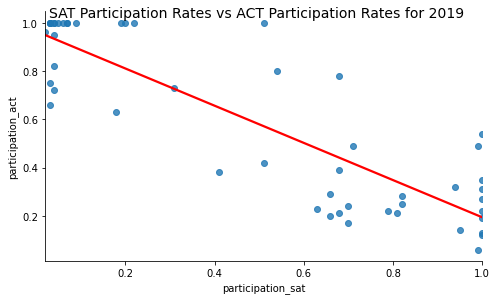

In [40]:
# Filter the columns for required data
filtered_table = combined[combined['year'] == 2019]
filtered_table = filtered_table.loc[:, ['state', 'participation_act', 'participation_sat']]

# Plotting of scatter chart
sat_vs_act = sns.lmplot(x = 'participation_sat', y = 'participation_act', data = filtered_table, height = 4, aspect = 1.7, line_kws={'color': 'red'}, ci = None)
sat_vs_act.fig.suptitle("SAT Participation Rates vs ACT Participation Rates for 2019", fontsize = 14)

**Observations:**

The SAT Participaton Rates are plotted against the ACT Participation Rates in the chart above. The purpose of the chart is to identify the relationship between the SAT Participation Rates and ACT Participations Rates.

SAT Participation Rates and ACT Participation Rates are negatively correlated. This means that states with high participation rates for SAT tend to have a relatively lower participation rate for ACT and states with low participation rates for SAT tend to have a higher participation rate for ACT.

This makes sense as both SAT and ACT are equally recognised and students can use either test in their college/university application. However, it is worth noting that there are still there are still students taking both tests despite only requiring one of the tests for their applications. This is because students can take both tests and submit the higher score for their college/university applications.

**SAT Participation Rates and SAT Participation Scores**

Text(0.5, 0.98, 'SAT Participation Rates vs Total SAT Score')

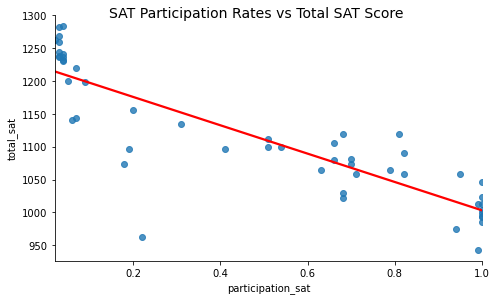

In [41]:
# Filter the columns for required data
filtered_table = combined[combined['year'] == 2019]
filtered_table = filtered_table.loc[:, ['state', 'participation_sat', 'total_sat']]

# Plotting of scatter chart
sat_rates_vs_sat_score = sns.lmplot(x = 'participation_sat', y = 'total_sat', data = filtered_table, height = 4, aspect = 1.7, line_kws={'color': 'red'}, ci = None)
sat_rates_vs_sat_score.fig.suptitle("SAT Participation Rates vs Total SAT Score", fontsize = 14)

**ACT Participation Rates and ACT Participation Scores**

Text(0.5, 0.98, 'ACT Participation Rates vs Total ACT Score')

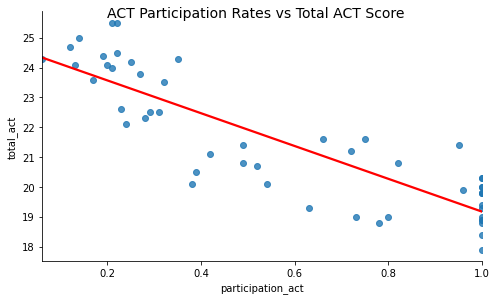

In [42]:
# Filter the columns for required data
filtered_table = combined[combined['year'] == 2019]
filtered_table = filtered_table.loc[:, ['state', 'participation_act', 'total_act']]

# Plotting of scatter chart
act_rates_vs_act_score = sns.lmplot(x = 'participation_act', y = 'total_act', data = filtered_table, height = 4, aspect = 1.7, line_kws={'color': 'red'}, ci = None)
act_rates_vs_act_score.fig.suptitle("ACT Participation Rates vs Total ACT Score", fontsize = 14)

**Observations:**

The charts above shows the relationship between the two tests and their respective total scores.

Both ACT and SAT total scores are inversely related to their participation rates. This means that states that have a lower participation rate tends to have a higher total score and vice versa.

States with higher SAT participation rates most probably means that SAT is made mandatory in these states. This means that students are prefer ACT to SAT are also forced to take SAT in these states. These students are less inclined to do well in SAT as they can use their ACT scores in their college/university applications. Students who are weak in the SAT sections / weren't fully prepared are also included in the population for states which have made SAT compulsory. These students are likely to pull down the total scores. ThThe same could be said for ACT.

Based on the "SAT Participation Rate" vs "SAT Total Score" chart, Oklahoma has relatively low score as compared to its participation rate. 

**Further Observations:**

In [43]:
# Pull out data for Oklahoma
oklahoma = combined[combined['state'] == "Oklahoma"]
oklahoma = oklahoma.loc[:, ['state', 'year','participation_sat', 'participation_act', 'total_sat']]
print("Data for Oklahoma:")
print("")
print(oklahoma)

Data for Oklahoma:

        state  year  participation_sat  participation_act  total_sat
110  Oklahoma  2017               0.07                1.0     1047.0
111  Oklahoma  2018               0.08                1.0     1062.0
112  Oklahoma  2019               0.22                1.0      963.0


Based on the data above, Oklahoma has seen a 15% increase in participation rates in 2019 despite ACT being mandatory in the state. This shows that students in the state are willing to take SAT in additional to ACT. This is despite ACT being made mandatory in the state. With the right effort, the participation rate for the state could be improved futher.

### Outside Research

Making SAT and ACT 




## Conclusions and Recommendations

### Key Takeaways:

1. SAT and ACT participation rates are inversely related to each other. Most students would choose either SAT or ACT. However, there are students who take both SAT and ACT. This is because they can use the higher of the tests in their college/ university applications.

2. Both ACT and SAT total scores are inversely related to their participation rates because if given a choice, students are more likely to take the test that best fits them.

### Recommendations:

**State to target:**
1. Based on the fact that Oklahoma has an increasing participation rate despite the lower mean scores and mandatory ACT test, more efforts should be spent in Oklahoma.

**Methods recommended:**

1. Work with state agencies to get SAT implemented state wide. States with expiring ACT contracts should be targeted.
2. To further encourage the participation rate in SAT, free/subsidised tuition/preparation classes should be introduced. Since students are more inclined to take the tests they are confident in, having these classes would definitely increase the participation rates.